<a href="https://colab.research.google.com/github/joshtrivedi/Machine-Learning/blob/main/DBSCAN_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive #to import google drive data

In [ ]:
drive.mount('/content/drive') #to mount the drive data into colab clound and enter the activation code

Mounted at /content/drive


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/DBSCAN"

/content/drive/My Drive/Colab Notebooks/DBSCAN


In [ ]:
dataset=pd.read_csv("KMeans.csv")

In [ ]:
dataset

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
X=dataset.iloc[:,[1,2]].values

In [ ]:
X.shape

(200, 2)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [ ]:
X=StandardScaler().fit_transform(X)

In [ ]:
ns=3

In [ ]:
nearestneighbours=NearestNeighbors(3).fit(X)

In [ ]:
distances,indices=nearestneighbours.kneighbors(X)

In [ ]:
indices

array([[  0,   4,  16],
       [  1,   3,  15],
       [  2,   6,   8],
       [  3,   5,  13],
       [  4,   0,  16],
       [  5,   3,  13],
       [  6,   2,   8],
       [  7,  11,  19],
       [  8,   6,   2],
       [  9,   5,  21],
       [ 10,  14,  12],
       [ 11,  19,   7],
       [ 12,  10,  14],
       [ 13,  15,   5],
       [ 14,  10,  12],
       [ 15,  13,   5],
       [ 16,  20,  18],
       [ 17,   9,  21],
       [ 18,  26,  20],
       [ 19,  11,   7],
       [ 20,  16,  26],
       [ 21,  23,   9],
       [ 22,  30,   8],
       [ 23,  21,  31],
       [ 24,  34,  36],
       [ 25,  35,  29],
       [ 26,  28,  20],
       [ 27,  17,  43],
       [ 28,  26,  18],
       [ 29,  25,  33],
       [ 30,  32,  22],
       [ 31,  37,  23],
       [ 32,  30,  22],
       [ 33,  41,  29],
       [ 34,  36,  24],
       [ 35,  25,  29],
       [ 36,  34,  24],
       [ 37,  39,  31],
       [ 38,  44,  40],
       [ 39,  37,  31],
       [ 40,  42,  44],
       [ 41,  33

In [ ]:
distances

In [ ]:
distanceDec=sorted(distances[:,2],reverse=True)

In [ ]:
distanceDec

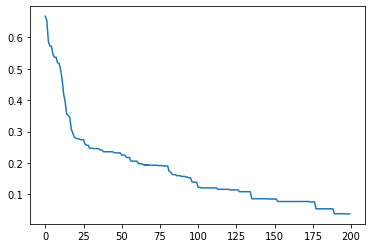

In [ ]:
plt.plot(indices[:,0],distanceDec)

In [ ]:
db=DBSCAN(eps=0.3,min_samples=5).fit(X)

In [ ]:
db

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [ ]:
labels=db.labels_ #-1 is noise points

In [ ]:
db.core_sample_indices_ #core datapoints

array([  1,   3,   5,   6,   9,  13,  15,  16,  18,  20,  21,  23,  26,
        31,  40,  42,  43,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 161, 163, 165,
       166, 170, 172, 173, 174, 176, 178, 179])

In [ ]:
core_samples_mask=np.zeros_like(db.labels_,dtype=bool)

In [ ]:
core_samples_mask[db.core_sample_indices_]=True

In [ ]:
core_samples_mask

array([False,  True, False,  True, False,  True,  True, False, False,
        True, False, False, False,  True, False,  True,  True, False,
        True, False,  True,  True, False,  True, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,

In [ ]:
n_clusters_=len(set(labels))-1

In [ ]:
n_clusters_

7

In [ ]:
unique_labels=set(labels)

In [ ]:
colors=[plt.cm.Spectral(i) for i in np.linspace(0,1,len(unique_labels))]

In [ ]:
colors #RGBA

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.8853517877739331, 0.3190311418685121, 0.29042675893886966, 1.0),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469, 1.0),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866, 1.0),
 (0.9288735101883892, 0.9715494040753557, 0.6380622837370243, 1.0),
 (0.6334486735870821, 0.8521337946943485, 0.6436755094194541, 1.0),
 (0.2800461361014994, 0.6269896193771626, 0.7024221453287197, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

In [ ]:
#core_sample_mask: Core datapoints

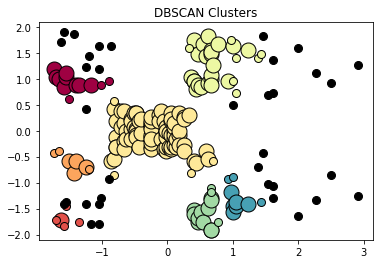

In [ ]:
for k,col in zip(unique_labels,colors):
  if(k==-1):
    col=[0,0,0,1] #noise points
  noise_mask=(labels==k)
  y=X[core_samples_mask & noise_mask] 
  plt.plot(y[:,0],y[:,1],'o',markerfacecolor=tuple(col),markeredgecolor='k',markersize=15) #core datapoints

  y=X[~core_samples_mask & noise_mask] #boundary datapoints
  plt.plot(y[:,0],y[:,1],'o',markerfacecolor=tuple(col),markeredgecolor='k',markersize=8)
plt.title('DBSCAN Clusters')
plt.show()
